In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

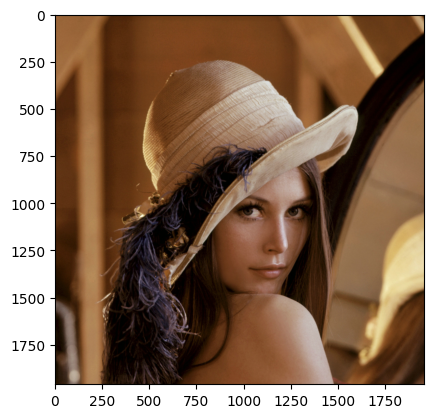

In [32]:
K = mpimg.imread('Lenna.jpg')
imgplot = plt.imshow(K)
plt.show()

In [33]:
gray_image = (K[:,:,0]*0.3 + K[:,:,1]*0.59 + K[:,:,2]*0.11)
# flattened_image = gray_image.reshape(-1)

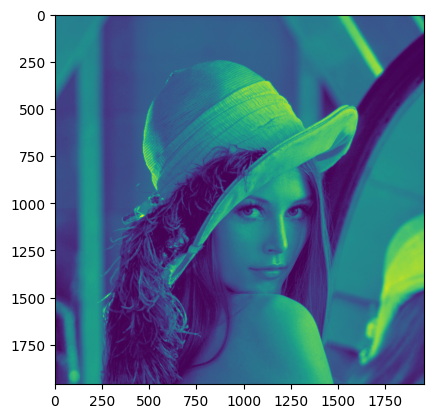

In [34]:
# image = flattened_image.reshape(256,256)
import matplotlib.pyplot as plt

plt.imshow(gray_image)
plt.show()

In [35]:
plt.imsave('DR.png', gray_image, cmap='gray')

In [27]:
import numba
import numba.cuda as cuda

In [36]:
image = plt.imread('DR.png')

In [40]:
import numba
import numpy as np

@numba.cuda.jit
def grayscale_kernel(image, grayscale):
    # Get the index of the current thread
    x, y = numba.cuda.grid(2)
    
    # Check if the index is within the bounds of the image
    if x < image.shape[1] and y < image.shape[0]:
        # Apply the grayscale formula to the current pixel
        grayscale[y, x] = 0.3 * image[y, x, 0] + 0.59 * image[y, x, 1] + 0.11 * image[y, x, 2]

def grayscale_gpu(image):
    # Convert the image to floating point
    image = image.astype(np.float32)
    
    # Allocate memory for the output image
    grayscale = np.empty((image.shape[0], image.shape[1]), dtype=np.float32)
    
    # Set the block and grid sizes
    block_size = (32, 32, 1)
    grid_size = (image.shape[1] // block_size[0] + 1, image.shape[0] // block_size[1] + 1)
    
    # Launch the kernel
    grayscale_kernel[grid_size, block_size](image, grayscale)
    
    # Return the grayscale image
    return grayscale

K = mpimg.imread('Lenna.jpg')
gpu = grayscale_gpu(K)


In [ ]:
print(gpu)

In [ ]:
plt.imsave('DR2.png', gray_image, cmap='gray')
image = plt.imread('DR2.png')
plt.imshow(image)
plt.show()